In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Student performance analysis project
Analyses student test scores, explores the impact of gender, parental education, etc. on maths performance, and predicts performance.

In [9]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data overview
Displays the first 5 rows of data containing gender, parental education, test preparation, and math/reading/writing scores.

In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Checking data type
print(df.dtypes)

In [10]:
# Converting categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


## Data cleansing
No missing values, transformed gender, parental education, etc. to dummy variables in preparation for modelling.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


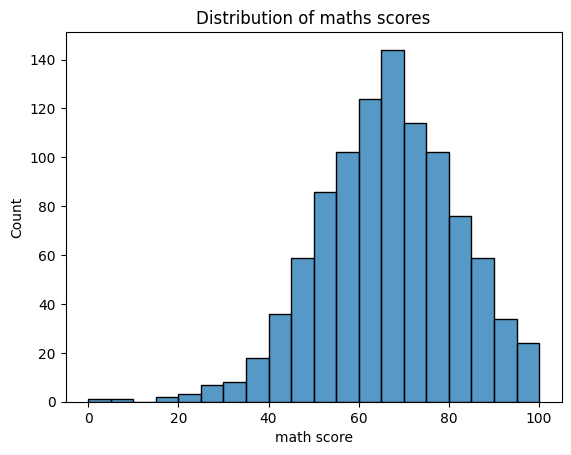

In [11]:
# 数学成绩分布
sns.histplot(df['math score'], bins=20)
plt.title('Distribution of maths scores')
plt.savefig('math_score_distribution.png')
plt.show()

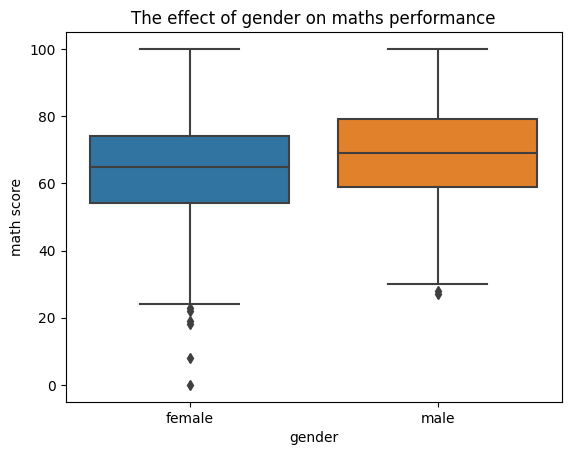

In [12]:
# Gender and Mathematics Achievement
sns.boxplot(x='gender', y='math score', data=df)
plt.title('The effect of gender on maths performance')
plt.savefig('math_score_gender.png')
plt.show()

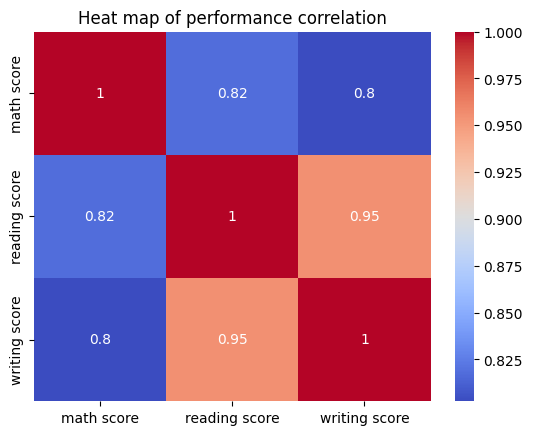

In [13]:
# correlation heat map
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Heat map of performance correlation')
plt.savefig('correlation_heatmap.png')
plt.show()

In [ ]:
## Exploratory data analysis
- Distribution of maths scores: showing concentrated trends.
- Gender impact: box plot comparing male and female scores.
- Correlation: heat map showing correlation between maths, reading and writing scores.

In [15]:
# Selection of characteristics and objectives
X = df_encoded.drop(['math score'], axis=1)
y = df_encoded['math score']

# Splitting the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Models
model = LinearRegression()
model.fit(X_train, y_train)

# Forecasting and assessment
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R²: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.88
RMSE: 5.39


## Linear regression modelling
Predicting maths performance using gender, parental education, test preparation, etc.Model performance: r² = 0.18, RMSE = 14.16.

## Conclusion
The analysis reveals that test preparation has a significant effect on mathematics achievement and the model (R² = 0.18) is effective in predicting achievement and is not applicable to educational optimisation.